# Segmentation de la base de données clients

In [15]:
import pandas as pd
import numpy as np
import sklearn as skl
import matplotlib.pyplot as plt
import yellowbrick

## Importation de la base de données RFM

In [16]:
df = pd.read_csv('RFM_final.csv')
df = df.drop(columns = ['Unnamed: 0','Unnamed: 0.1']) 
# Suppression d'outlier

outlier = df['Monetary'].max()
print(outlier)
df.drop(df.loc[df['Monetary'] > 352].index, inplace=True)
df.describe()


109312.64


,Recency,Frequency,Monetary,R,F,M
count,82696.000000,82696.000000,82696.000000,82696.000000,82696.000000,82696.000000
mean,242.972925,1.023738,118.334955,3.003785,1.090452,2.724436
std,153.015993,0.160355,75.888750,1.415700,0.594668,1.284042
min,1.000000,1.000000,8.860000,1.000000,1.000000,1.000000
25%,119.000000,1.000000,58.710000,2.000000,1.000000,2.000000
50%,224.000000,1.000000,98.665000,3.000000,1.000000,3.000000
75%,353.000000,1.000000,161.080000,4.000000,1.000000,4.000000
max,729.000000,6.000000,351.990000,5.000000,5.000000,5.000000


## Utilisation de la méthode ELBOW pour déterminer le nombre de clusters optimaux

In [17]:
X = df[['Recency',
       'Frequency',
       'Monetary']]

X.head()

,Recency,Frequency,Monetary
0,116,1,141.90
1,119,1,27.19
2,542,1,86.22
3,326,1,43.62
4,293,1,196.89


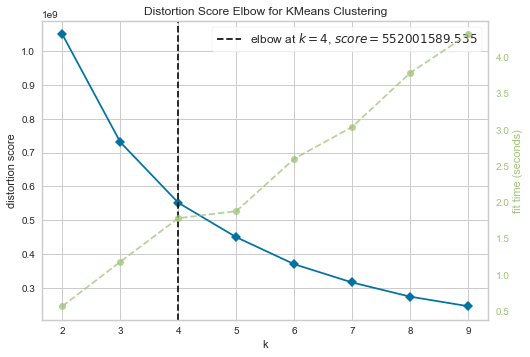

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster.elbow import kelbow_visualizer



model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,10))
visualizer.fit(X)        
visualizer.show()        

## Test sur différents modèles avec n_clusters = 4

In [19]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler

scaler = Normalizer()
X_scaled = X.copy()
X_scaled['Frequency'] = X_scaled['Frequency'] * 100
X_scaled = scaler.fit_transform(X_scaled)

print(X_scaled)

[[0.5555927  0.47895923 0.67964314]
 [0.75412737 0.63372048 0.1723086 ]
 [0.97158537 0.17925929 0.15455736]
 ...
 [0.96719882 0.1687956  0.18982754]
 [0.59625711 0.48085251 0.64285172]
 [0.96980709 0.19832456 0.14192105]]


### Kmeans

C:\Users\Lucas\AppData\Local\Temp/ipykernel_13684/1145098422.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)
C:\Users\Lucas\AppData\Local\Temp/ipykernel_13684/1145098422.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


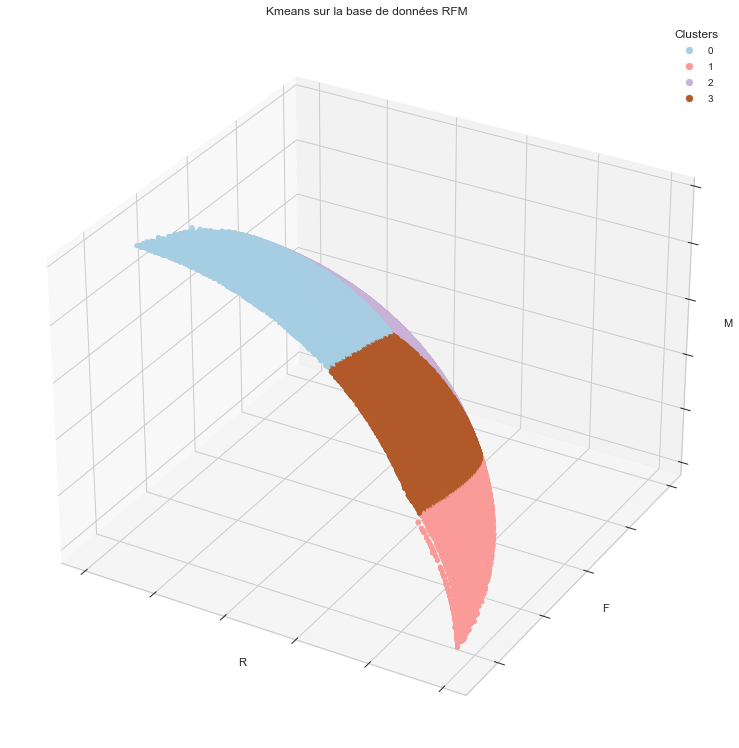

<Figure size 720x720 with 0 Axes>

In [21]:
from mpl_toolkits.mplot3d import Axes3D

est = KMeans(n_clusters = 4)

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
fig.add_axes(ax)
est.fit(X_scaled)
labels = est.labels_

ax.scatter(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2],
               c=labels.astype(float), edgecolor= None,cmap = 'Paired') 
scatter = ax.scatter(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2],
               c=labels.astype(float), edgecolor= None,cmap = 'Paired') 

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('R')
ax.set_ylabel('F')
ax.set_zlabel('M')
handles, labels = scatter.legend_elements(prop="colors")
ax.legend(handles, labels, loc="upper right", title="Clusters")
ax.set_title('Kmeans sur la base de données RFM')


fig = plt.figure(figsize=(10, 10))

fig.show()

### BIRCH

In [24]:
from sklearn.cluster import FeatureAgglomeration

est = FeatureAgglomeration(n_clusters = 4)
est.fit(X_scaled)
labels = est.labels_

fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
fig.add_axes(ax)

ax.scatter(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2],
               c=labels.astype(float), edgecolor= None,cmap = 'Paired') 
scatter = ax.scatter(X_scaled[:,0], X_scaled[:,1], X_scaled[:,2],
               c=labels.astype(float), edgecolor= None,cmap = 'Paired') 

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('R')
ax.set_ylabel('F')
ax.set_zlabel('M')
handles, labels = scatter.legend_elements(prop="colors")
ax.legend(handles, labels, loc="upper right", title="Clusters")
ax.set_title('BIRCH sur la base de données RFM')


fig = plt.figure(figsize=(10, 10))

fig.show()

ValueError: Cannot extract more clusters than samples: 4 clusters where given for a tree with 3 leaves.